In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.colors as mcolors

from ipynb.fs.full.UtilFunctions import format_season, std
from ipynb.fs.full.UtilCollections import SEASONS, CURRENT_TEAMS, WESTERN_CONF_TEAMS, EASTERN_CONF_TEAMS, ATLANTIC_DIV_TEAMS, CENTRAL_DIV_TEAMS, SOUTHEAST_DIV_TEAMS, NORTHWEST_DIV_TEAMS, SOUTHWEST_DIV_TEAMS, PACIFIC_DIV_TEAMS

In [2]:
def get_csvs_by_season(season):
    first_year, second_year = format_season(season)
    
    player_df = pd.read_csv("DataCollection/Player_Stats/player_stats_{0}-{1}.csv".format(first_year, second_year))
    team_df = pd.read_csv("DataCollection/Team_Stats/team_stats_{0}-{1}.csv".format(first_year, second_year))
    adv_team_df = pd.read_csv("DataCollection/Advanced_Team_Stats/adv_team_stats_{0}-{1}.csv".format(first_year, second_year))
    
    return player_df, team_df, adv_team_df

In [3]:
player_dfs, team_dfs, adv_team_dfs = [], [], []

for season in SEASONS:
    player_df, team_df, adv_team_df = get_csvs_by_season(season)
    player_dfs.append(player_df)
    team_dfs.append(team_df)
    adv_team_dfs.append(adv_team_df)

In [4]:
free_throw_rate_diff = {}
for index, row in adv_team_dfs[20].iterrows():
    diff = row["Off_FT/FGA"] - row["Def_FT/FGA"]
    string_diff = "{:.2f}".format(diff) + " - " + str(row["Made_Playoffs"])
    
    free_throw_rate_diff[row["Team"]] = string_diff    
    
free_throw_rate_diff = sorted(free_throw_rate_diff.items(), key=lambda x: x[1], reverse=True)
free_throw_rate_diff

[('OKC', '0.06 - True'),
 ('LAC', '0.03 - True'),
 ('DAL', '0.03 - True'),
 ('HOU', '0.03 - True'),
 ('CHO', '0.03 - False'),
 ('MIL', '0.02 - True'),
 ('MIA', '0.02 - True'),
 ('UTA', '0.02 - True'),
 ('ORL', '0.02 - True'),
 ('SAS', '0.02 - False'),
 ('GSW', '0.02 - False'),
 ('TOR', '0.01 - True'),
 ('BRK', '0.01 - True'),
 ('PHO', '0.01 - False'),
 ('DET', '0.01 - False'),
 ('CLE', '0.01 - False'),
 ('CHI', '-0.06 - False'),
 ('SAC', '-0.05 - False'),
 ('NYK', '-0.04 - False'),
 ('MEM', '-0.03 - False'),
 ('NOP', '-0.03 - False'),
 ('ATL', '-0.03 - False'),
 ('PHI', '-0.02 - True'),
 ('DEN', '-0.02 - True'),
 ('IND', '-0.02 - True'),
 ('WAS', '-0.02 - False'),
 ('BOS', '-0.01 - True'),
 ('POR', '-0.01 - True'),
 ('MIN', '-0.01 - False'),
 ('LAL', '-0.00 - True')]

In [5]:
rating_diff_by_seasons = []
for i in range(len(SEASONS)):
    rating_diff = {}
    
    for index, row in adv_team_dfs[i].iterrows():
        diff = row["ORtg"] - row["DRtg"]
        string_diff = "{:.2f}".format(diff) 
        float_diff = float(string_diff)
        
        rating_diff[row["Team"]] = [float_diff, row["Made_Playoffs"]]
    
    rating_diff = sorted(rating_diff.items(), key=lambda x: x[1][0], reverse=True)
    rating_diff_by_seasons.append(rating_diff)

In [6]:
#Calculate percentage of teams with positive x negative rating that make the playoffs

positive_rating_counter = 0
positive_rating_and_playoffs_counter = 0
negative_rating_counter = 0
negative_rating_and_playoffs_counter = 0
neutral_rating_counter = 0
neutral_rating_and_playoffs_counter = 0


for ratings in rating_diff_by_seasons:
    for rating in ratings:
        if rating[1][0] > 0.0:
            positive_rating_counter += 1
            if rating[1][1]:
                positive_rating_and_playoffs_counter += 1
        elif rating[1][0] == 0.0:
            print(rating)
            neutral_rating_counter += 1
            if rating[1][1]:
                neutral_rating_and_playoffs_counter += 1
        else:
            negative_rating_counter +=1
            if rating[1][1]:
                negative_rating_and_playoffs_counter += 1
                
playoff_probability_positive_rating = (positive_rating_and_playoffs_counter / positive_rating_counter) * 100
str_positive_probability = "{:.2F}".format(playoff_probability_positive_rating)
playoff_probability_neutral_rating = (neutral_rating_and_playoffs_counter / neutral_rating_counter) * 100
str_neutral_probability = "{:.2F}".format(playoff_probability_neutral_rating)
playoff_probability_negative_rating = (negative_rating_and_playoffs_counter / negative_rating_counter) * 100
str_negative_probability = "{:.2F}".format(playoff_probability_negative_rating)

print("% of teams with a positive net rating that make the playoffs:", str_positive_probability)
print("% of teams with a neutral net rating that make the playoffs:", str_neutral_probability)
print("% of teams with a negative net rating that make the playoffs:", str_negative_probability)

('OKC', [0.0, False])
('LAL', [0.0, True])
('MIA', [0.0, True])
('IND', [0.0, False])
% of teams with a positive net rating that make the playoffs: 92.77
% of teams with a neutral net rating that make the playoffs: 50.00
% of teams with a negative net rating that make the playoffs: 13.17


In [7]:
#Calculate average net rating of playoff teams over the last 20 years
#Calculate percentage of teams with above x below average rating that make the playoffs

avg_net_ratings = []

for ratings in rating_diff_by_seasons:
    playoff_counter = 0
    total_rating_playoff_teams = 0.0
    for rating in ratings:
        if rating[1][1]:
            playoff_counter += 1
            total_rating_playoff_teams += rating[1][0]

    avg_playoff_team_net_rating = total_rating_playoff_teams / playoff_counter
    avg_net_ratings.append(float('{:.2f}'.format(avg_playoff_team_net_rating)))
    
print(avg_net_ratings)

[3.49, 3.54, 3.24, 3.2, 3.04, 3.0, 3.14, 3.01, 4.47, 3.73, 4.02, 3.76, 3.76, 3.62, 3.44, 3.42, 3.58, 2.89, 3.21, 3.51, 3.3, 3.44]


In [8]:
#Calculate percentage of teams with above x below average rating that make the playoffs

i = 0
teams_above_avg = []

for ratings in rating_diff_by_seasons:
    above_avg_rating_counter = 0
    above_avg_rating_and_playoffs_counter = 0
    below_avg_rating_counter = 0
    below_avg_rating_and_playoffs_counter = 0
    season_avg = avg_net_ratings[i]
    above_avg_counter = 0
    for rating in ratings:
        if rating[1][0] >= season_avg:
            above_avg_rating_counter += 1
            above_avg_counter += 1
            if rating[1][1]:
                above_avg_rating_and_playoffs_counter += 1
        else:
            below_avg_rating_counter +=1
            if rating[1][1]:
                below_avg_rating_and_playoffs_counter += 1
    i += 1
    teams_above_avg.append(above_avg_counter)
                
above_avg_p = (above_avg_rating_and_playoffs_counter / above_avg_rating_counter) * 100
below_avg_p = (below_avg_rating_and_playoffs_counter / below_avg_rating_counter) * 100

print("% of teams with an above average net rating that make the playoffs:", '{:.2f}'.format(above_avg_p))
print("% of teams with a below average net rating that make the playoffs:", '{:.2f}'.format(below_avg_p))
print(teams_above_avg)

% of teams with an above average net rating that make the playoffs: 100.00
% of teams with a below average net rating that make the playoffs: 39.13
[7, 8, 8, 6, 7, 6, 6, 8, 10, 7, 8, 9, 5, 8, 9, 8, 7, 7, 7, 8, 6, 7]


In [9]:
teams_net_rating = {}

for team in CURRENT_TEAMS:
    teams_net_rating[team] = [[], []]

for team in CURRENT_TEAMS:
    for ratings in rating_diff_by_seasons:
        team_in_rating = list(filter(lambda x: x[0] == team, ratings))
        print(team_in_rating)
        if team_in_rating:
            net_rating = team_in_rating[0][1][0]
            made_playoffs = team_in_rating[0][1][1]
            teams_net_rating[team][0].append(net_rating)
            teams_net_rating[team][1].append(made_playoffs)
            
teams_net_rating["BRK"]

[('ATL', [-5.9, False])]
[('ATL', [-5.6, False])]
[('ATL', [-4.6, False])]
[('ATL', [-3.8, False])]
[('ATL', [-5.1, False])]
[('ATL', [-10.5, False])]
[('ATL', [-5.2, False])]
[('ATL', [-5.3, False])]
[('ATL', [-2.0, True])]
[('ATL', [1.7, True])]
[('ATL', [5.2, True])]
[('ATL', [-0.9, True])]
[('ATL', [3.7, True])]
[('ATL', [0.4, True])]
[('ATL', [-0.5, True])]
[('ATL', [5.8, True])]
[('ATL', [3.7, True])]
[('ATL', [-0.8, True])]
[('ATL', [-5.6, False])]
[('ATL', [-5.8, False])]
[('ATL', [-7.6, False])]
[('ATL', [2.4, True])]
[('BOS', [-0.8, False])]
[('BOS', [-2.3, False])]
[('BOS', [2.4, True])]
[('BOS', [-0.4, True])]
[('BOS', [-1.6, True])]
[('BOS', [0.9, True])]
[('BOS', [-1.7, False])]
[('BOS', [-3.7, False])]
[('BOS', [11.3, True])]
[('BOS', [8.2, True])]
[('BOS', [3.9, True])]
[('BOS', [5.9, True])]
[('BOS', [2.8, True])]
[('BOS', [-0.2, True])]
[('BOS', [-4.8, False])]
[('BOS', [0.2, True])]
[('BOS', [3.2, True])]
[('BOS', [2.8, True])]
[('BOS', [3.7, True])]
[('BOS', [4.4, T

[[-5.5,
  4.5,
  5.7,
  2.8,
  -1.7,
  1.5,
  -0.9,
  -5.4,
  -2.7,
  -9.9,
  -6.8,
  -6.7,
  2.0,
  -1.0,
  -3.0,
  -7.7,
  -6.6,
  -3.7,
  -0.1,
  -0.6,
  4.5],
 [False,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True]]

In [10]:
team_playoff_counter = {}

for team in CURRENT_TEAMS:
    team_playoff_counter[team] = 0

for i in range(len(SEASONS)):
    for index, row in adv_team_dfs[i].iterrows():
        if row["Team"] in CURRENT_TEAMS:
            if row["Made_Playoffs"]:
                team_playoff_counter[row["Team"]] += 1
            
team_playoff_counter = sorted(team_playoff_counter.items(), key=lambda x : x[1], reverse=True)
team_playoff_counter

[('SAS', 20),
 ('BOS', 17),
 ('DAL', 17),
 ('IND', 16),
 ('MIA', 16),
 ('LAL', 15),
 ('POR', 15),
 ('UTA', 14),
 ('DEN', 13),
 ('HOU', 13),
 ('MIL', 13),
 ('PHI', 13),
 ('BRK', 12),
 ('OKC', 12),
 ('TOR', 12),
 ('ATL', 11),
 ('CHI', 11),
 ('DET', 11),
 ('MEM', 11),
 ('ORL', 11),
 ('LAC', 10),
 ('CLE', 9),
 ('PHO', 9),
 ('WAS', 9),
 ('GSW', 8),
 ('NOP', 7),
 ('NYK', 7),
 ('SAC', 7),
 ('CHO', 6),
 ('MIN', 6)]

In [11]:
wc_playoff_counter = list(filter(lambda x : x[0] in WESTERN_CONF_TEAMS, team_playoff_counter))
wc_playoff_counter

wc_aux = [p[1] for p in wc_playoff_counter]

std(wc_aux)

3.90213616710984

In [12]:
ec_playoff_counter = list(filter(lambda x : x[0] in EASTERN_CONF_TEAMS, team_playoff_counter))
ec_playoff_counter

ec_aux = [p[1] for p in ec_playoff_counter]

std(ec_aux)

3.0506829836393465

In [17]:
CURRENT_TEAMS

['ATL',
 'BOS',
 'BRK',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'TOR',
 'UTA',
 'WAS']

In [18]:
mcolors.CSS4_COLORS['tomato']

'#FF6347'

In [32]:
all_league_colors = ['#E03A3E', '#007A33', '#000000', '#CE1141', '#1D1160', '#860038', '#00538C', '#0E2240', '#C8102E', 
                     '#1D428A', '#CE1141', '#002D62', '#BEC0C2', '#552583', '#5D76A9', '#98002E', '#00471B', '#0C2340',
                     '#0C2340', '#006BB6', '#007AC1', '#0077C0', '#006BB6', '#1D1160', '#E03A3E', '#5A2D81', '#C4CED4', 
                     '#A1A1A4', '#002B5C', '#002B5C']
colors = ['b', 'g', 'r', 'm', 'y']

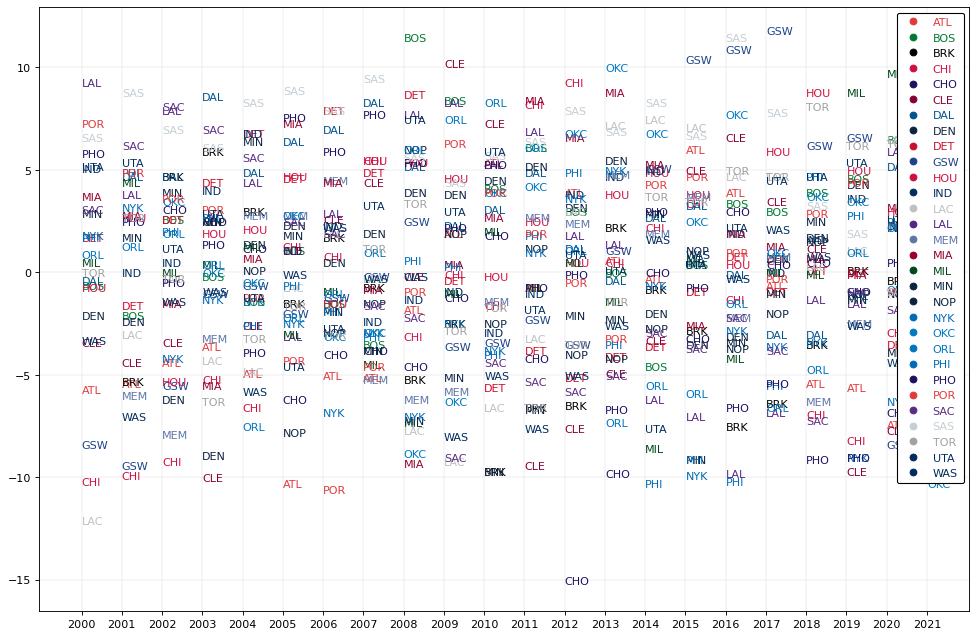

In [49]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in CURRENT_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)

    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, all_league_colors[i], 'none')
    
    plt.scatter(SEASONS, teams_net_rating[team][0], s=0, label=team)    
    for j in range(len(SEASONS)):
        if teams_net_rating[team][0][j]:
            plt.text(SEASONS[j], teams_net_rating[team][0][j], team, size=10, c=all_league_colors[i])
    
    i += 1
    
plt.grid(lw=0.2)
plt.xticks(SEASONS)
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in all_league_colors]
plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=10, loc='upper right', frameon=True, framealpha=1, labelcolor=all_league_colors)
plt.show()

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in CURRENT_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)

    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, all_league_colors[i], 'none')
    
    plt.scatter(SEASONS, teams_net_rating[team][0], s=0, label=team)    
    for j in range(len(SEASONS)):
        if teams_net_rating[team][0][j]:
            plt.text(SEASONS[j], teams_net_rating[team][0][j], team, size=10, c=all_league_colors[i])
    
    i += 1
    
plt.grid(lw=0.2)
plt.xticks(SEASONS)
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in all_league_colors]
plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=10, loc='upper right', frameon=True, framealpha=1, labelcolor=all_league_colors)
plt.show()

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in ATLANTIC_DIV_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)

    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, colors[i], 'none')
    
    plt.grid(lw=0.2)
    plt.scatter(SEASONS, teams_net_rating[team][0], s=300, lw=2, facecolors=col, edgecolors=colors[i], label=team)    

    i += 1
    
plt.xticks(SEASONS)
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in colors]
plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=12, loc='upper right', frameon=True, framealpha=1, labelcolor=colors)
plt.show()

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in CENTRAL_DIV_TEAMS:
    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, colors[i], 'none')
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
    
    plt.grid(lw=0.2)
    plt.scatter(SEASONS, teams_net_rating[team][0], s=300, lw=2, facecolors=col, edgecolors=colors[i], label=team)    

    i += 1
    
plt.xticks(SEASONS)
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in colors]
plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=12, loc='upper right', frameon=True, framealpha=1, labelcolor=colors)
plt.show()

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in SOUTHEAST_DIV_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(2, None)
            teams_net_rating[team][1].insert(2, None)
    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, colors[i], 'none')

    plt.grid(lw=0.2)
    plt.scatter(SEASONS, teams_net_rating[team][0], s=300, lw=2, facecolors=col, edgecolors=colors[i], label=team)    

    i += 1
    
plt.xticks(SEASONS)
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in colors]
plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=12, loc='upper right', frameon=True, framealpha=1, labelcolor=colors)
plt.show()

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in NORTHWEST_DIV_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)
    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, colors[i], 'none')
    
    plt.grid(lw=0.2)
    plt.scatter(SEASONS, teams_net_rating[team][0], s=300, lw=2, facecolors=col, edgecolors=colors[i], label=team)    

    i += 1
    
plt.xticks(SEASONS)
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in colors]
plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=12, loc='upper right', frameon=True, framealpha=1, labelcolor=colors)
plt.show()

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in PACIFIC_DIV_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)
    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, colors[i], 'none')
    
    plt.grid(lw=0.2)
    plt.scatter(SEASONS, teams_net_rating[team][0], s=300, lw=2, facecolors=col, edgecolors=colors[i], label=team)    

    i += 1
    
plt.xticks(SEASONS)
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in colors]
plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=12, loc='upper right', frameon=True, framealpha=1, labelcolor=colors)
plt.show()

In [ ]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in SOUTHWEST_DIV_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)
    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, colors[i], 'none')

    plt.grid(lw=0.2)
    plt.scatter(SEASONS, teams_net_rating[team][0], s=300, lw=2, facecolors=col, edgecolors=colors[i], label=team)    

    i += 1
    
plt.xticks(SEASONS)
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([0], [0], marker='o', markerfacecolor=x, markeredgecolor=x, ls='') for x in colors]
plt.legend(new_handles, labels, markerscale=1, edgecolor='black', fontsize=12, loc='upper right', frameon=True, framealpha=1, labelcolor=colors)
plt.show()